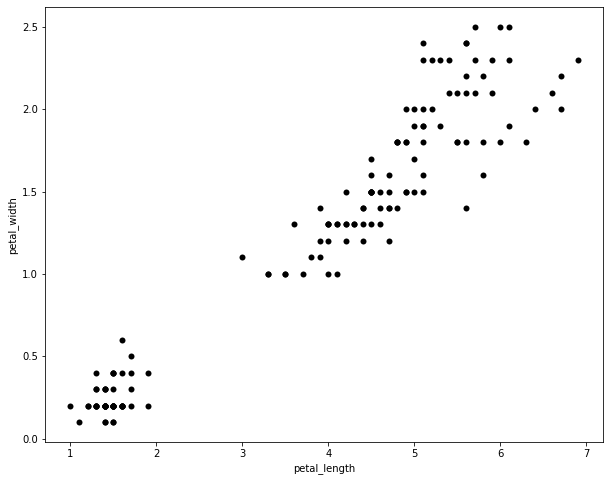

In [96]:
#임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# iris 데이터 로드
iris = sns.load_dataset('iris')

# 데이터 산점도
plt.figure(figsize=(10,8))
plt.scatter(iris['petal_length'], iris['petal_width'], color='black', linewidths=0)
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

In [122]:
from sklearn.mixture import GaussianMixture

# iris petal 데이터만 추출
iris_petal = iris[['petal_length','petal_width']]

# 클러스터링 개수 2,3 두가지 경우를 비교
gmm_comp_2 = GaussianMixture(n_components=2, n_init=10)
gmm_comp_3 = GaussianMixture(n_components=3, n_init=10)
gmm_comp_2.fit(iris_petal)
gmm_comp_3.fit(iris_petal)
gmm_comp_2_cluster_labels = gmm_comp_2.predict(iris_petal)
gmm_comp_3_cluster_labels = gmm_comp_3.predict(iris_petal)

iris['gmm_comp_2_cluster'] = gmm_comp_2_cluster_labels
iris['gmm_comp_3_cluster'] = gmm_comp_3_cluster_labels

# iris.groupby(['species'])['gmm_comp_2_cluster'].value_counts()
iris.groupby(['species'])['gmm_comp_3_cluster'].value_counts()

species     gmm_comp_3_cluster
setosa      0                     50
versicolor  2                     49
            1                      1
virginica   1                     47
            2                      3
Name: gmm_comp_3_cluster, dtype: int64

In [167]:
gmm_comp_6 = GaussianMixture(n_components=6, n_init=10)
gmm_comp_6.fit(iris_petal)
gmm_comp_6_cluster_labels = gmm_comp_6.predict(iris_petal)

iris['gmm_comp_6_cluster'] = gmm_comp_6_cluster_labels
iris.groupby(['species'])['gmm_comp_6_cluster'].value_counts()

species     gmm_comp_6_cluster
setosa      4                     29
            1                     21
versicolor  2                     39
            3                     11
virginica   0                     25
            3                     13
            5                     10
            2                      2
Name: gmm_comp_6_cluster, dtype: int64

In [138]:
iris_petal

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [184]:
del aic_list, bic_list

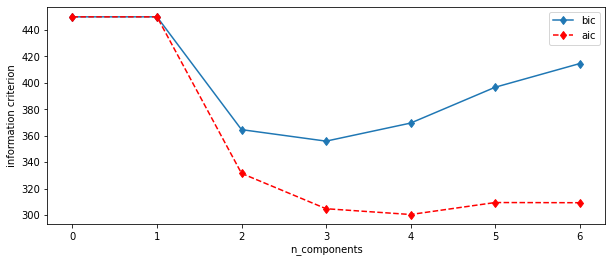

In [204]:
# 클러스터 2번 부터 시작
bic_list = [450,450]
aic_list = [450,450]

for i in range(2,7):
    gmm = GaussianMixture(n_components = i).fit(iris_petal)
    
    if gmm:
        bic_list.append(gmm.bic(iris_petal))
        aic_list.append(gmm.aic(iris_petal))

plt.figure(figsize=(10,4))
plt.plot(bic_list, '-d', label='bic')
plt.plot(aic_list, '--d', color='red', label='aic')
plt.xlabel('n_components')
plt.ylabel('information criterion')
plt.legend()
plt.show()

In [128]:
gmm_comp_2.aic(iris_petal)

331.4626558367153

In [127]:
gmm_comp_2.bic(iris_petal)

364.57964407177417

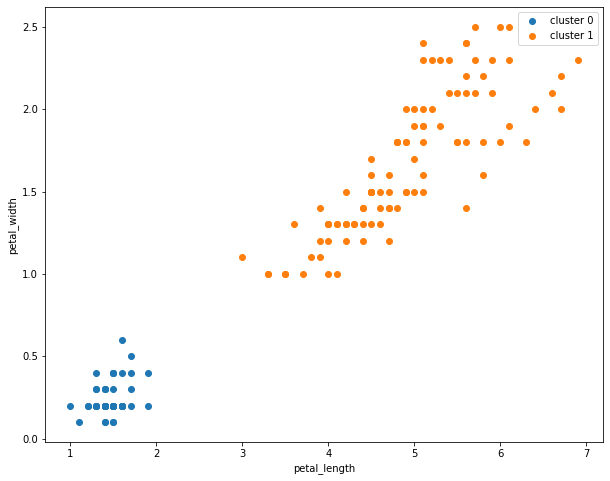

In [124]:
plt.figure(figsize=(10,8))

for i in range(2):
    plt.scatter(iris.loc[iris['gmm_comp_2_cluster'] == i, 'petal_length'],
                iris.loc[iris['gmm_comp_2_cluster'] == i, 'petal_width'], 
                label = 'cluster '+str(i))
# 클러스터 3의 경우
# for i in range(3):
#     plt.scatter(iris.loc[iris['gmm_comp_3_cluster'] == i, 'petal_length'],
#                 iris.loc[iris['gmm_comp_3_cluster'] == i, 'petal_width'], 
#                 label = 'cluster '+str(i))
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()
plt.show()

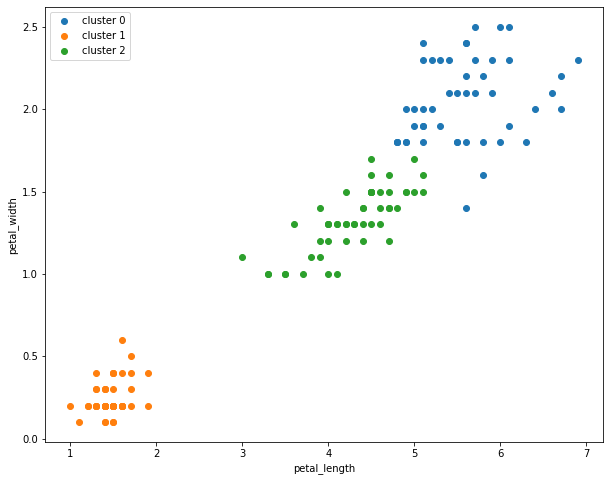

In [119]:
plt.figure(figsize=(10,8))

for i in range(3):
    plt.scatter(iris.loc[iris['gmm_comp_3_cluster'] == i, 'petal_length'], iris.loc[iris['gmm_comp_3_cluster'] == i, 'petal_width'], 
                label = 'cluster '+str(i))
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()
plt.show()

In [207]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(iris_petal)
np.round(bgm.weights_, 2)

array([0.34, 0.31, 0.35, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])